# Location visualisation of randomly generated coordinates using the Unity Perspective plugin.

This notebook loads in a dataset generated by the Unity Perspective plugin and visualises the randomly chosen coordinates on a 2D football field. The goal of this notebook is to prove that the randomly chosen coordinates form a uniform distribution across the football field. This is necessary in order to generate valid data for the model to train on. If the locations do not form an even distribution across the football field, then the model does not get a complete image of the football field to train on.

### **Install dependencies**
This notebook requires the *pysolotools* dependency to load the SOLO dataset. This dependency can be installed with the following command:<br>
pip3 install pysolotools (on some systems with the argument: --index-url=https://artifactory.prd.it.unity3d.com/artifactory/api/pypi/pypi/simple)
<br><br>
To install the matplotlib textures:<br>
pip3 install matplotlib<br>
pip3 install mplsoccer

The following cell loads in all the coordinate data from the images in the dataset that are stored in the 'solo' folder.

In [6]:
from UnityDataset import CustomData

dataset_path = "S:\datasets\solo100kv2"

# Load the SOLO dataset from the solo folder
try:
    dataset = CustomData(dataset_path)
except Exception as e:
    print("Error opening folder, error message:", e)
    print("Please add a SOLO dataset in a folder named 'solo' in this directory")

Loaded filenames and positions from JSON file.
finished setting up dataset
Items in dataset: 100000


In [4]:
# Extract the [x, y, z] coordinates from the position attribute in the SOLO dataframes.

captures = dataset.captures
positions = dataset.positions

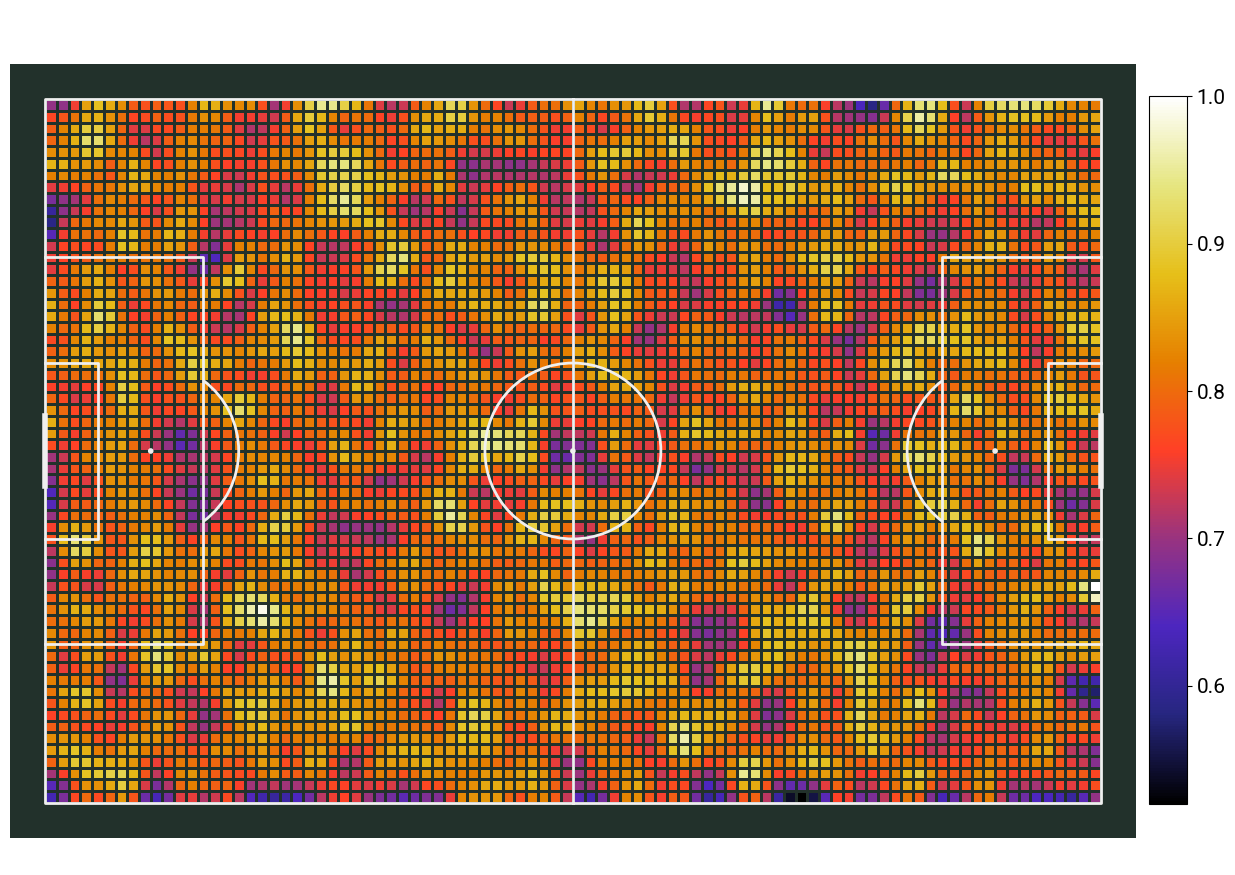

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mplsoccer import Pitch, FontManager
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap

# Transform Unity coordinates into Matplotlib coordinates
x = [x * (120 / 90) for x, _, _ in positions]
y = [y * (80 / 60) for _, _, y in positions]

# Setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')

# Draw
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)
# fig.set_facecolor('#22312b')
fig.set_facecolor('white')

bin_statistic = pitch.bin_statistic(x, y, statistic='count', bins=(90, 60))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

# Normalize count values
count_norm = colors.Normalize(vmin=0, vmax=bin_statistic['statistic'].max())
bin_statistic['statistic'] = count_norm(bin_statistic['statistic'])
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='CMRmap', edgecolors='#22312b')

# Add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
robotto_regular = FontManager()
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)

# Endnote and title
axs['endnote'].text(1, 0.5, '', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.5, f"",
                             color='black',
                             va='center', ha='center',
                             fontproperties=robotto_regular.prop, fontsize=30)

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

plt.show()